In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## Data Preprocessing:

In [3]:
df=pd.read_csv("EastWestAirlines.csv")

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
def hist(df,columns):
    plt.figure(figsize=(30,20))
    df.hist(bins=15)
    plt.suptitle("Histogram")
    plt.show()

<Figure size 3000x2000 with 0 Axes>

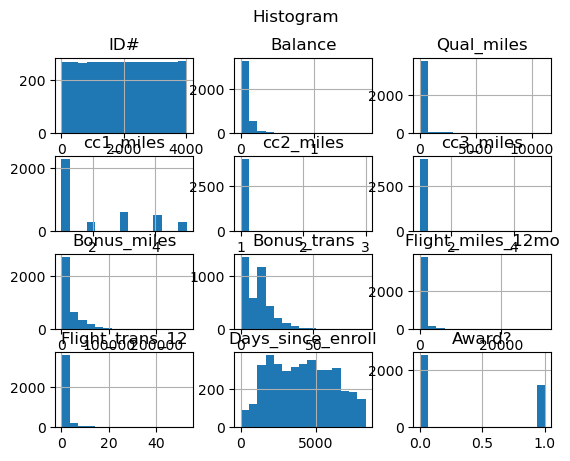

In [8]:
hist(df,df.columns)

In [9]:
def bar(df,columns):
    plt.figure(figsize=(20,10))
    sns.barplot(data=df)
    plt.show()

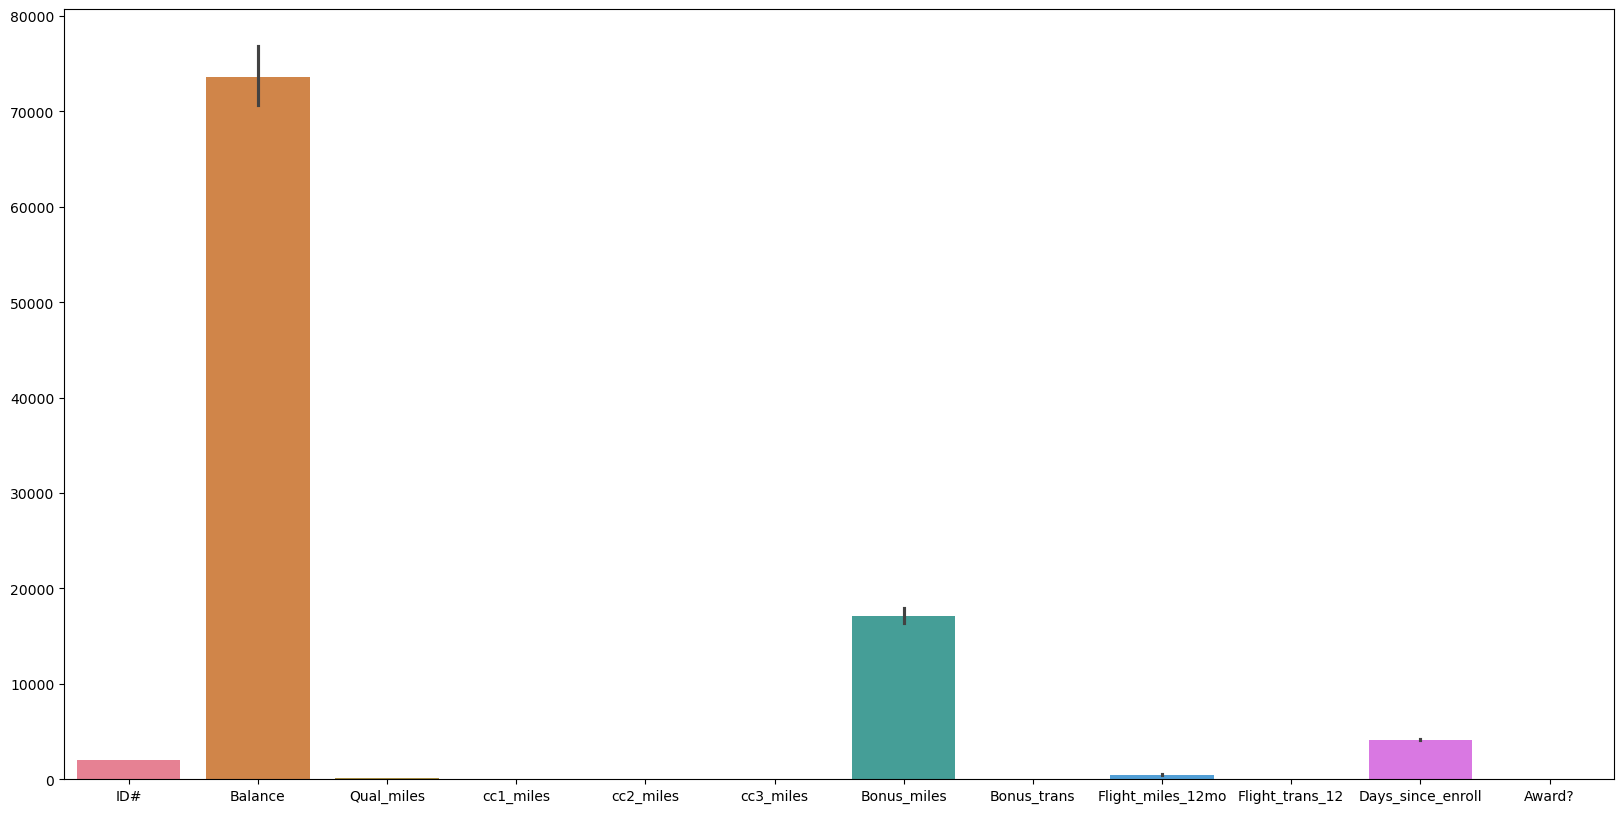

In [10]:
bar(df,df.columns)

In [11]:
def scatter(df,columns):
    plt.figure(figsize=(20,10))
    sns.scatterplot(data=df)
    plt.show()

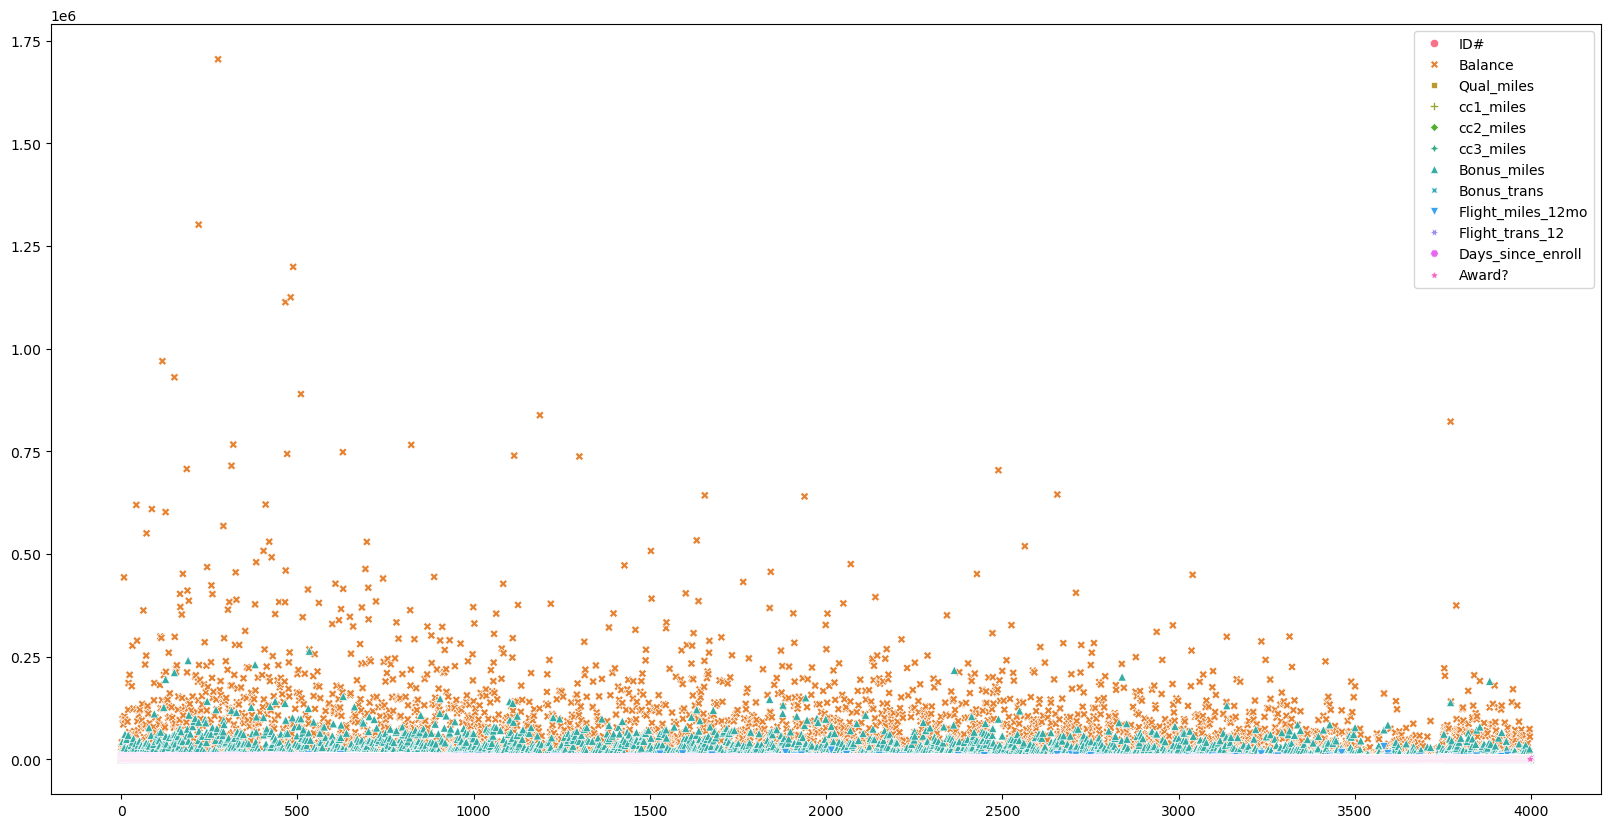

In [12]:
scatter(df,df.columns)

In [13]:
def pair(df,columns):
    plt.figure(figsize=(20,20))
    sns.pairplot(data=df)
    plt.suptitle("Scatter Plot")
    plt.show()

<Figure size 2000x2000 with 0 Axes>

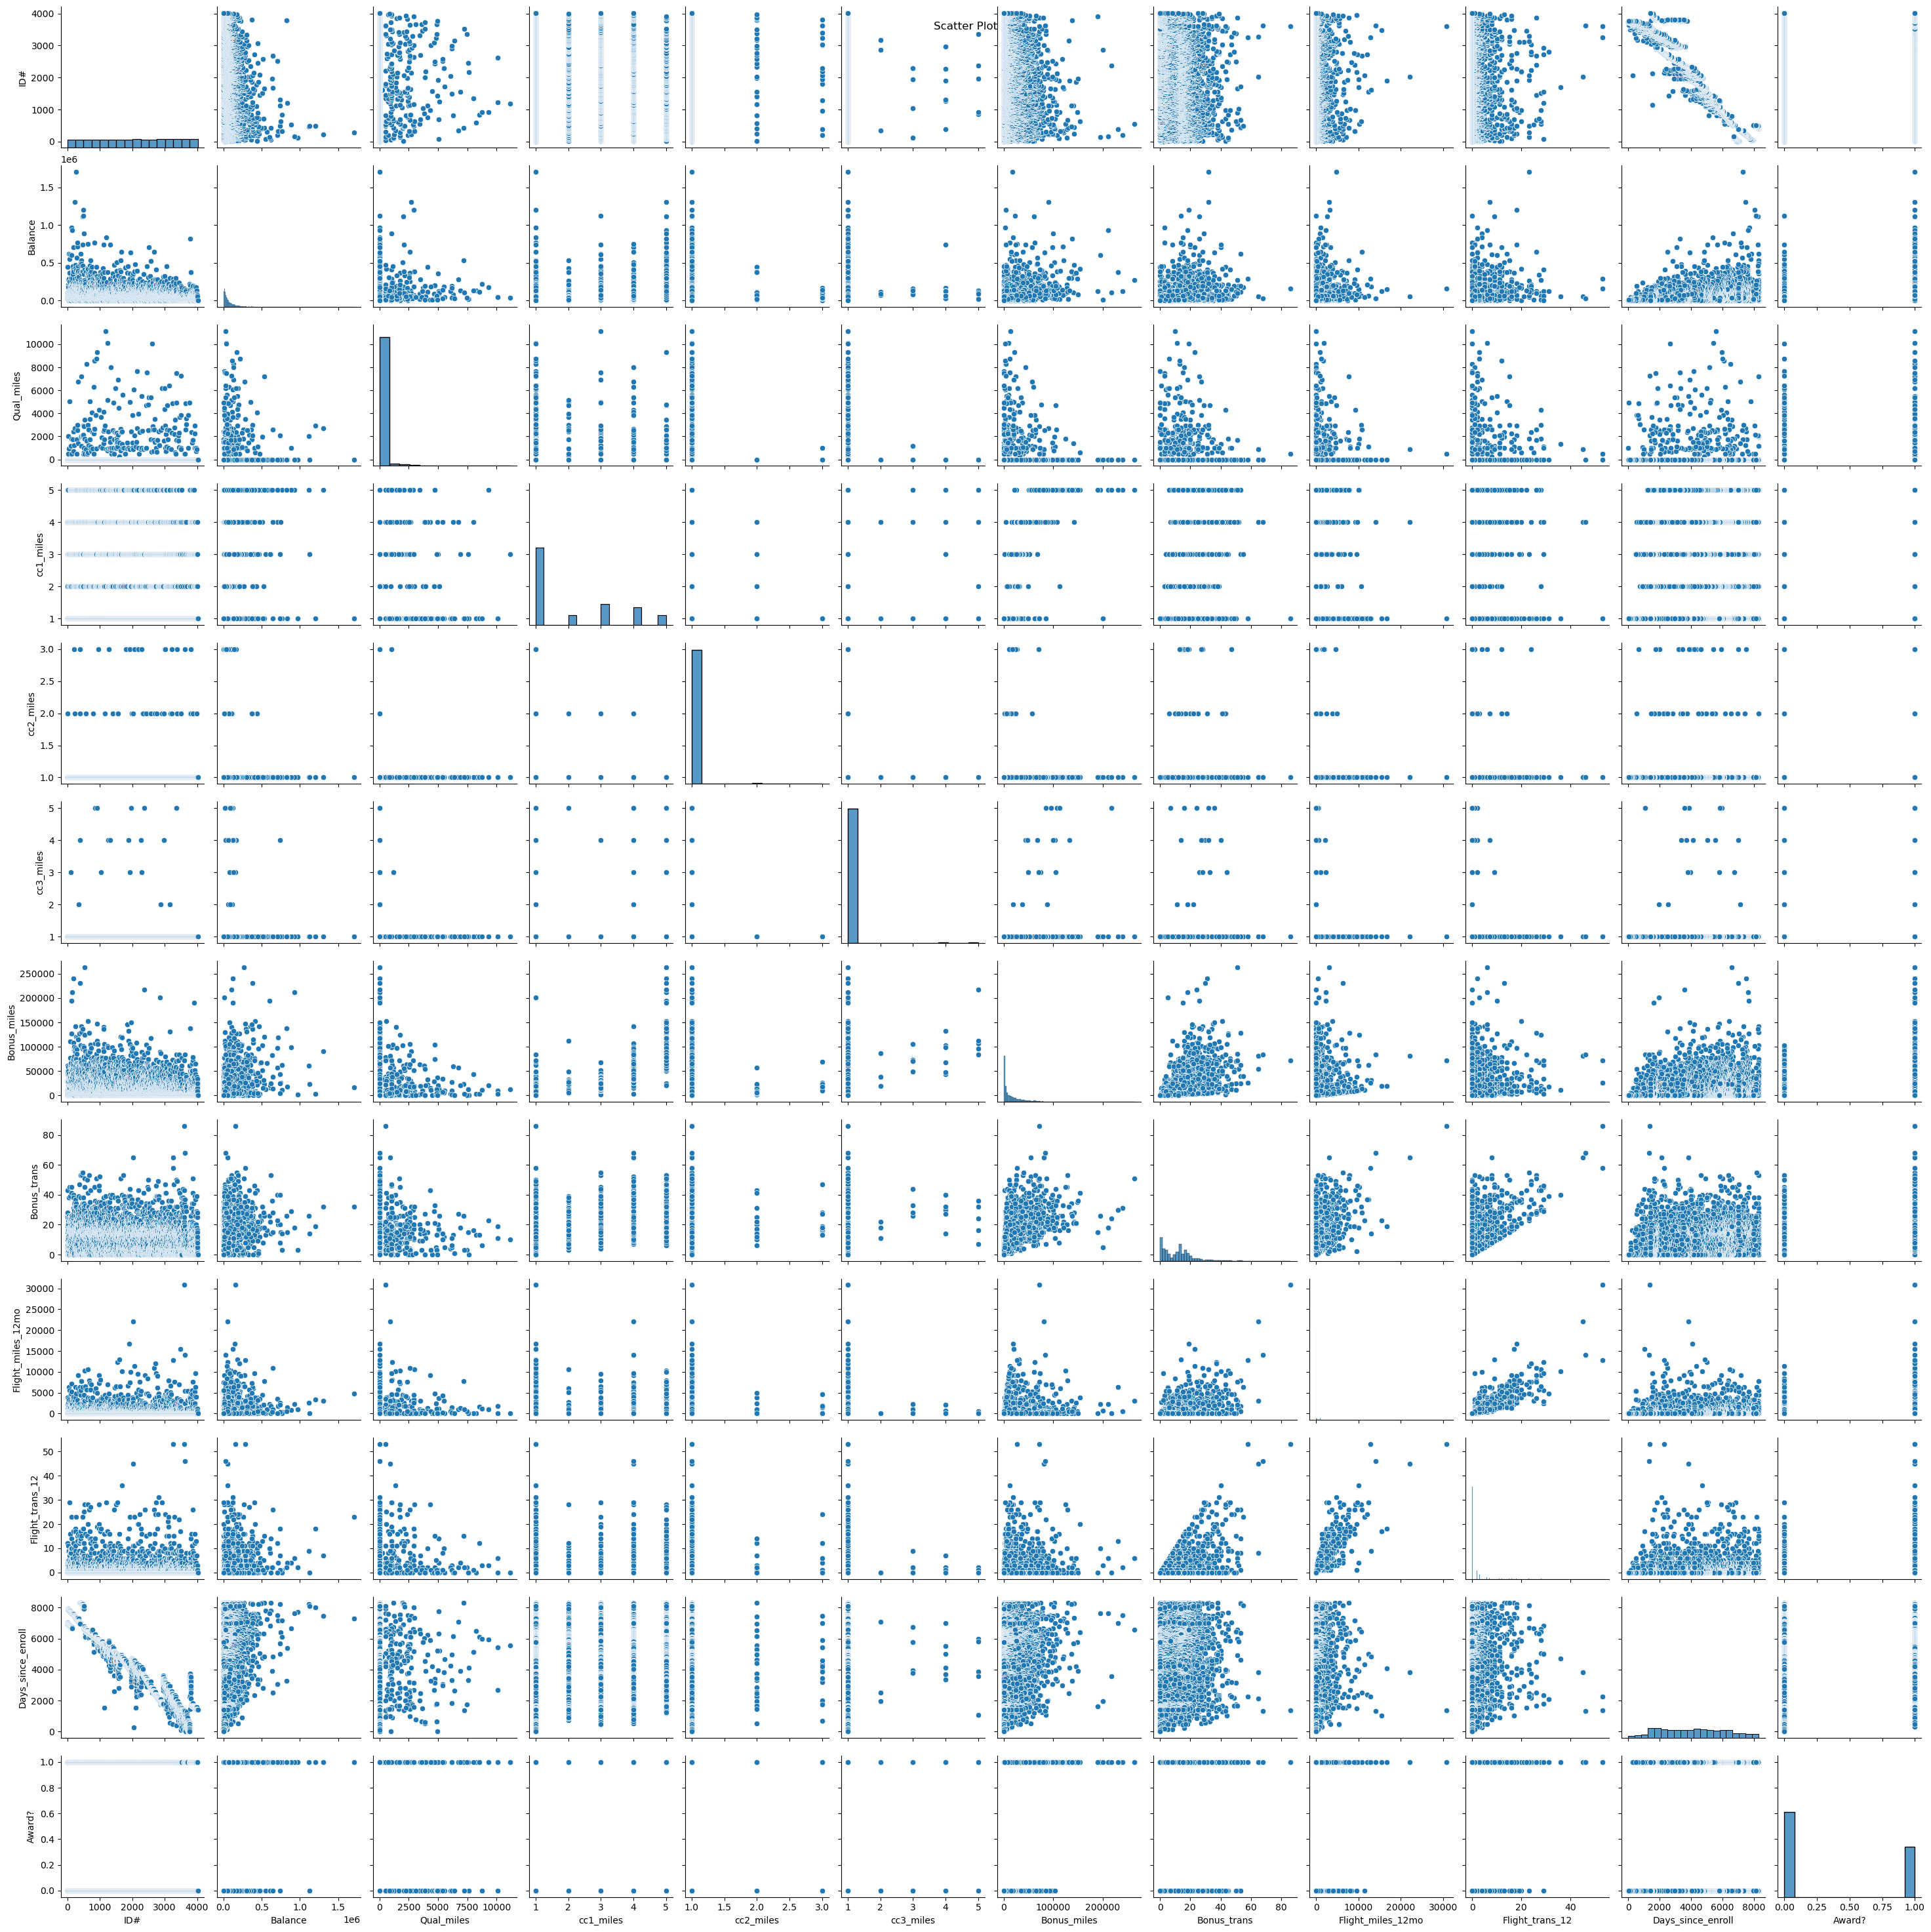

In [14]:
pair(df,df.columns)

In [15]:
def kde(df,columns):
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df)
    plt.show()

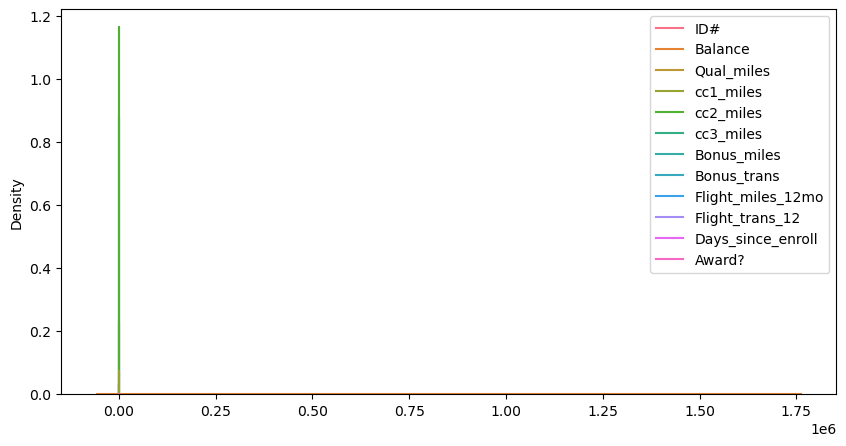

In [16]:
kde(df,df.columns)

In [17]:
def box_plot(df,columns):
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df,color='grey')
    plt.show()

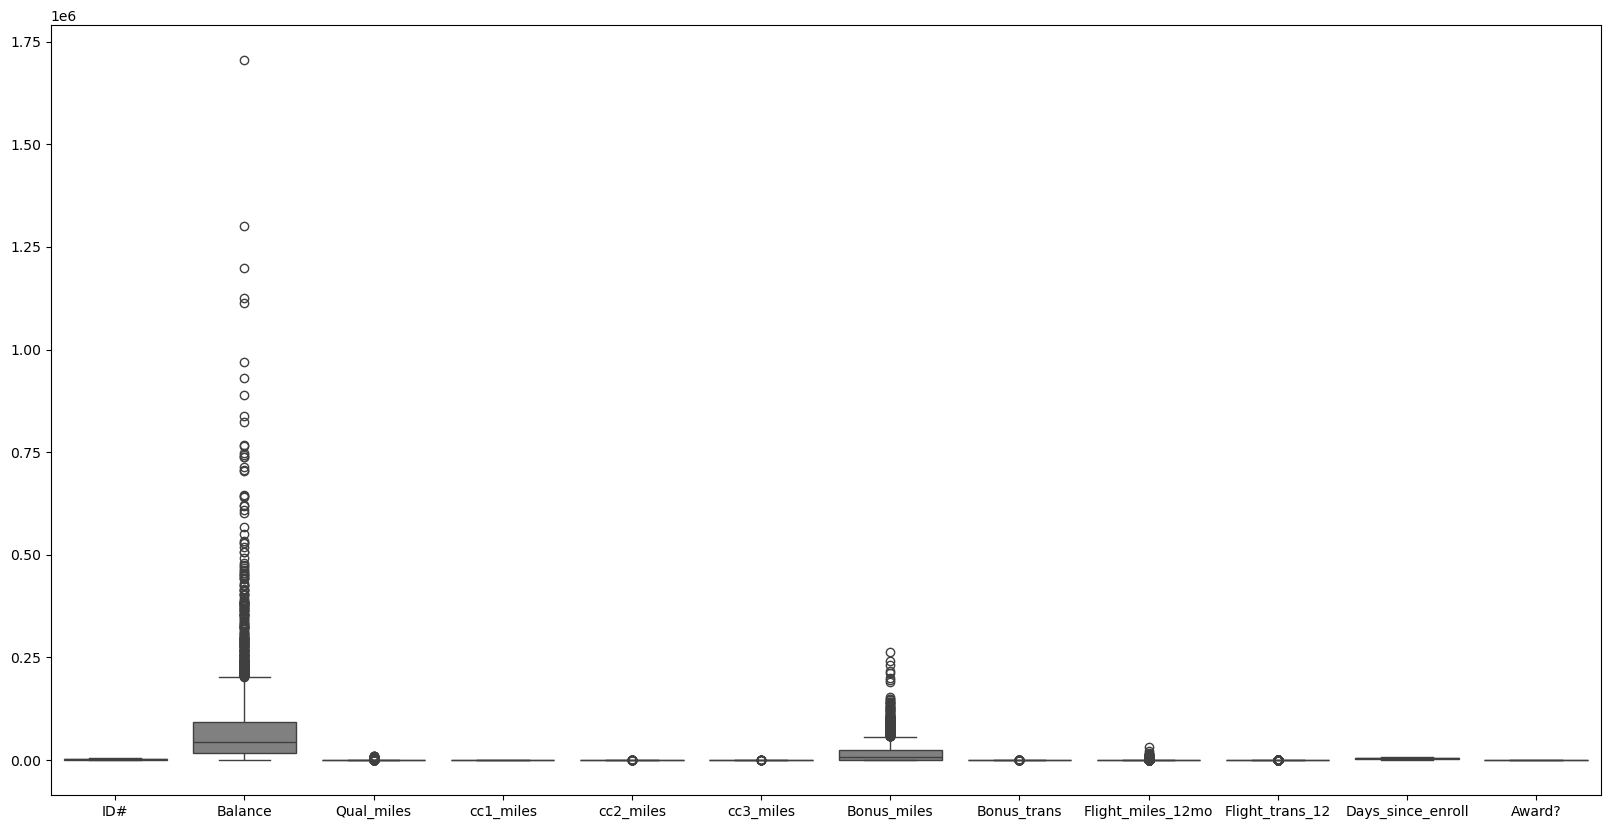

In [18]:
box_plot(df,df.columns)

In [19]:
std=StandardScaler()
d=pd.DataFrame(std.fit_transform(df),columns=df.columns)
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


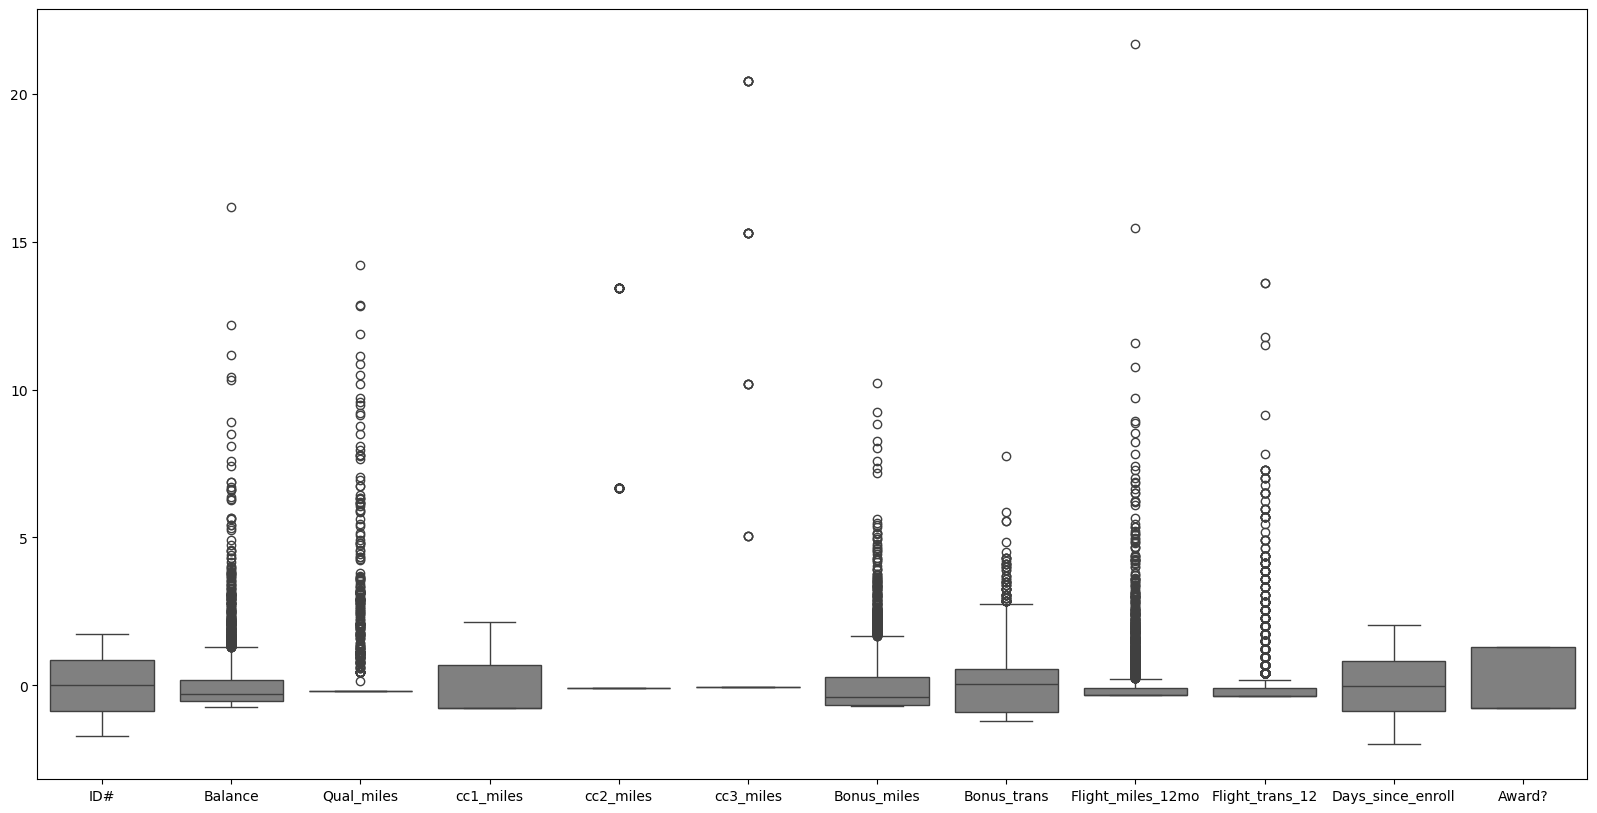

In [20]:
box_plot(d,d.columns)

In [21]:
def o_r(df,columns):
    thres=2
    z_score=stats.zscore(df[columns])
    return df[(abs(z_score)<thres).all(axis=1)]

In [22]:
df=o_r(df,df.columns)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [24]:
d=o_r(d,d.columns)

In [25]:
d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


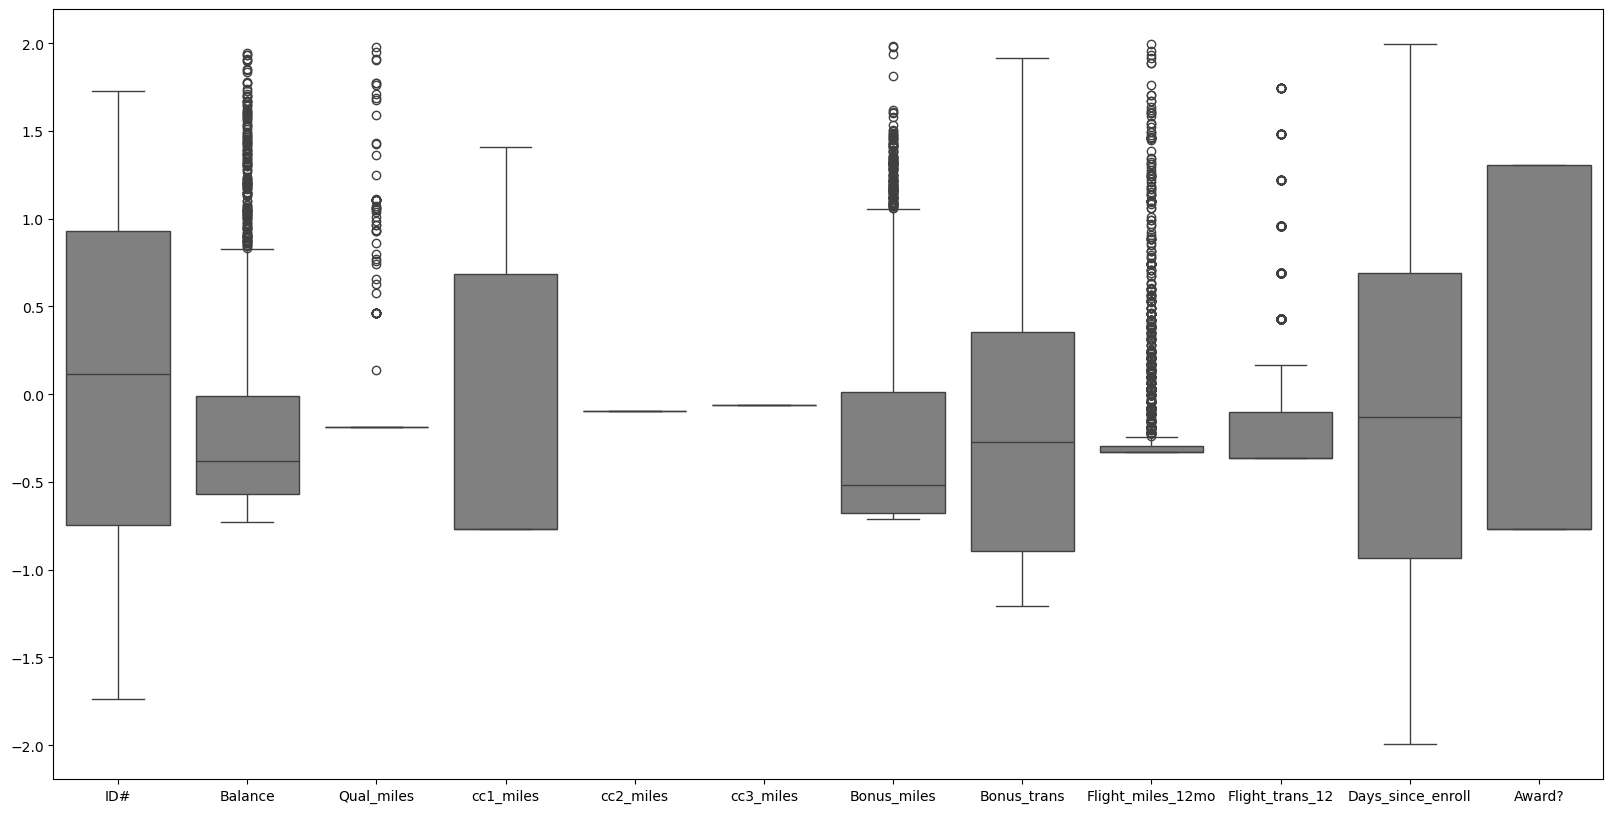

In [26]:
box_plot(d,d.columns)

In [27]:
def corr(df,columns):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.corr(),annot=True)
    plt.show()

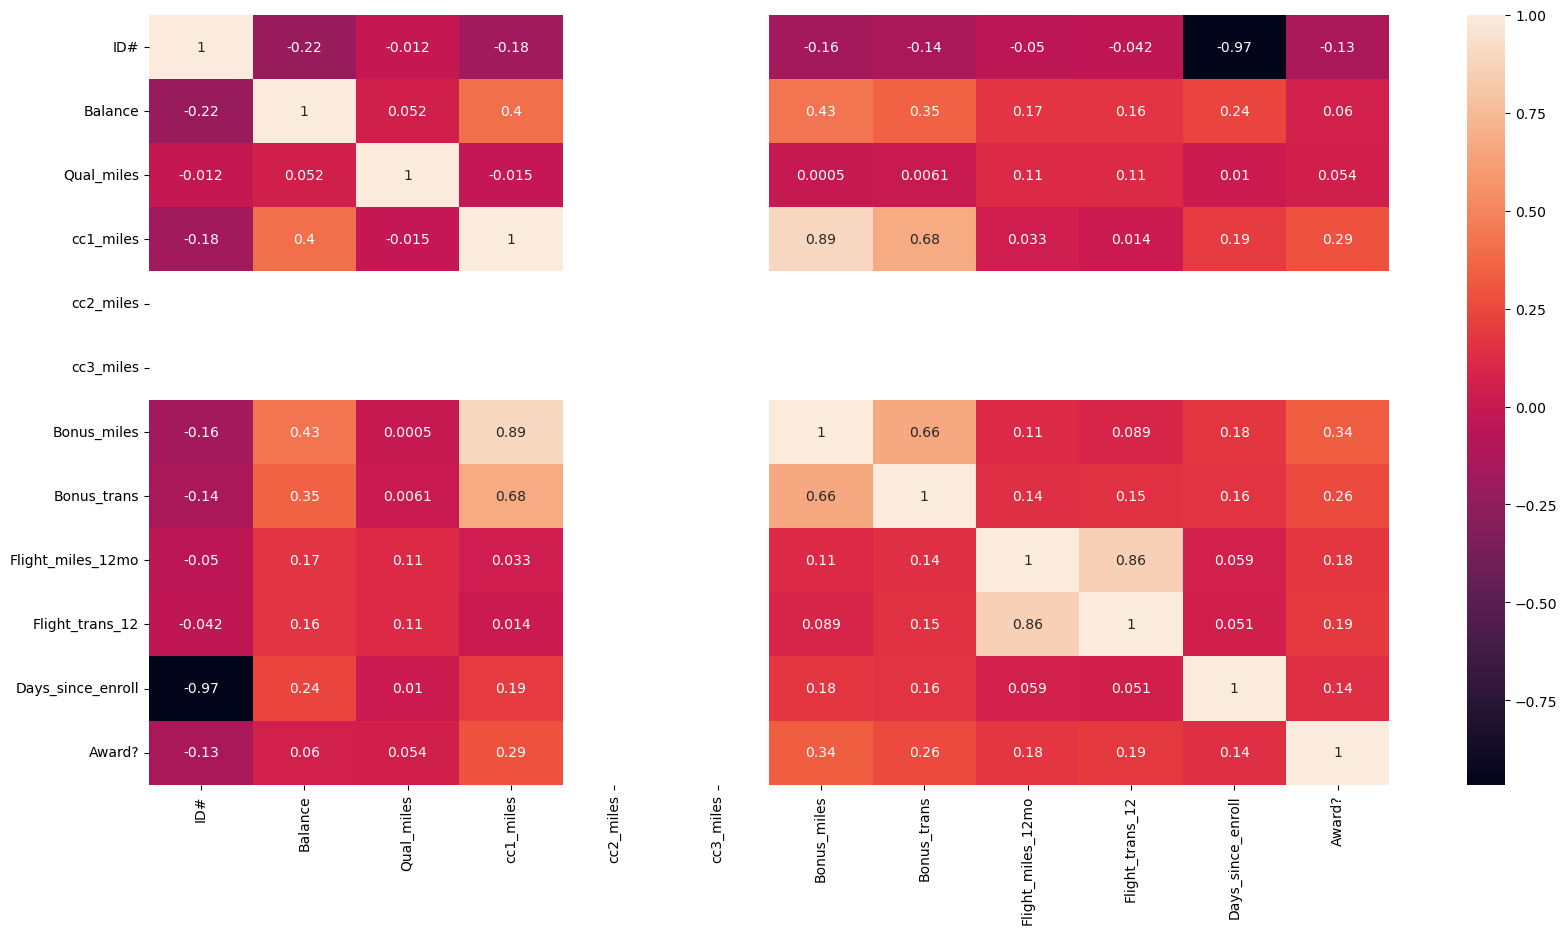

In [28]:
corr(df,df.columns)

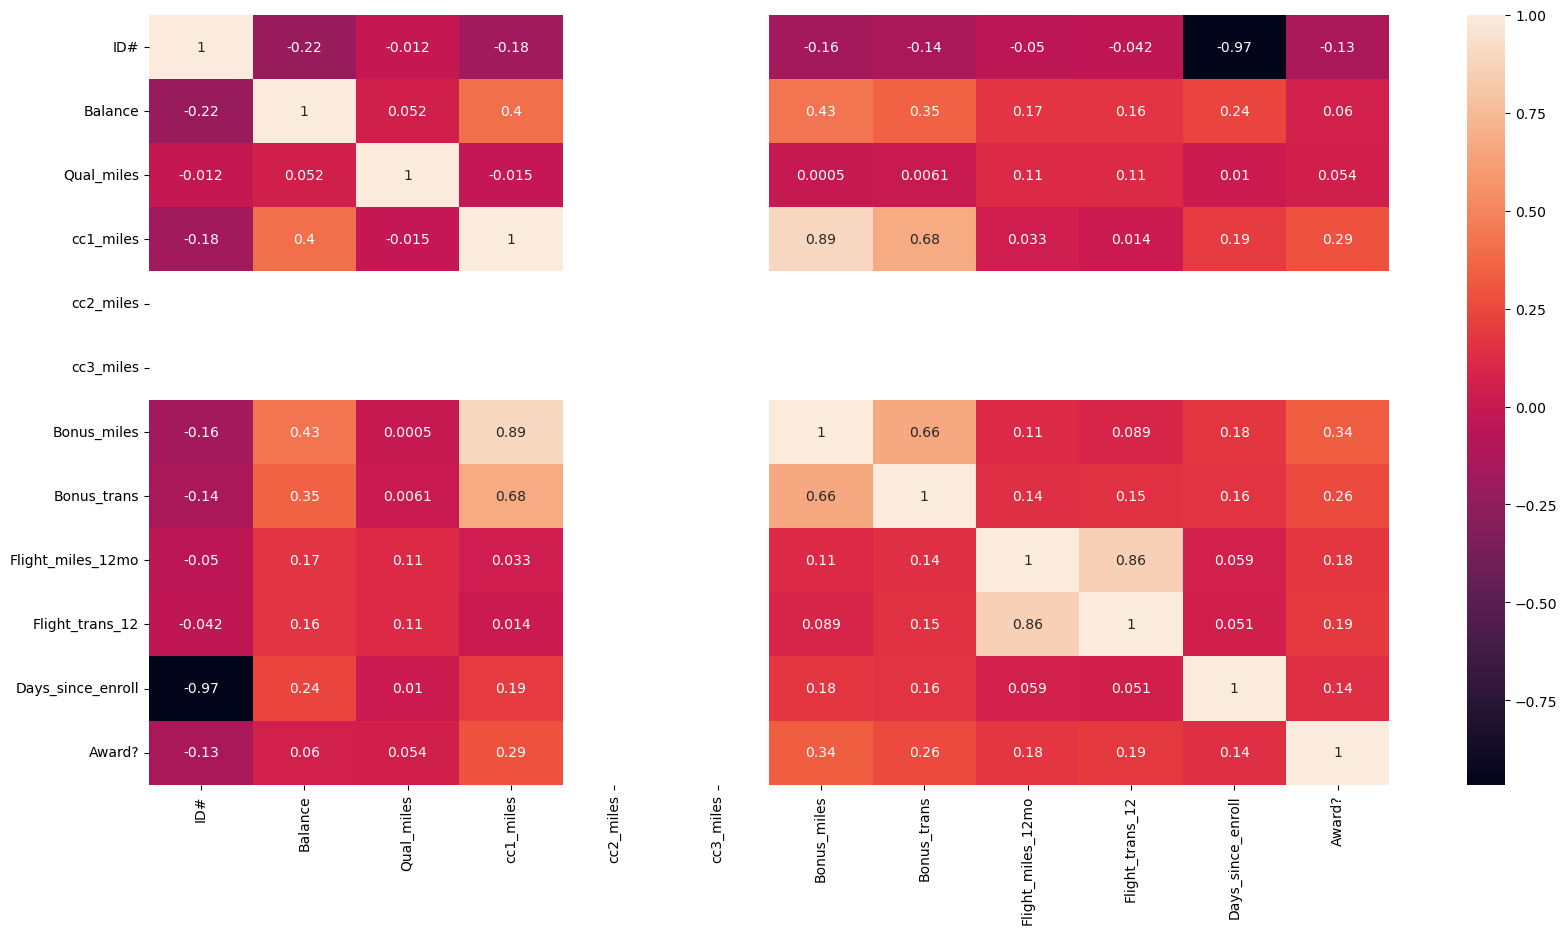

In [141]:
corr(d,d.columns)

### Implementing Clustering Algorithms:

## KMEANS CLUSTERING

In [31]:
features=d.drop(columns=['Flight_miles_12mo','ID#','Balance'])

In [143]:
kmeans=KMeans(n_clusters=5,random_state=40)
cluster=kmeans.fit(features)

In [145]:
cluster

KMeans(n_clusters=5, random_state=40)

In [146]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4])

In [150]:
features

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.098503,-1.316088,-0.766919


In [152]:
silhouette_score(features,cluster.labels_)

0.36129039300941157

In [37]:
## Optimal Value For K

In [38]:
n_clusters=range(1,11)
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[11413.729173218486, 7578.235693883251, 6011.312962886838, 4876.183198969441, 3711.8131706525487, 3410.0664819678045, 3138.7540850135847, 2758.331571840602, 2494.5900948936987, 2507.7654683546284]


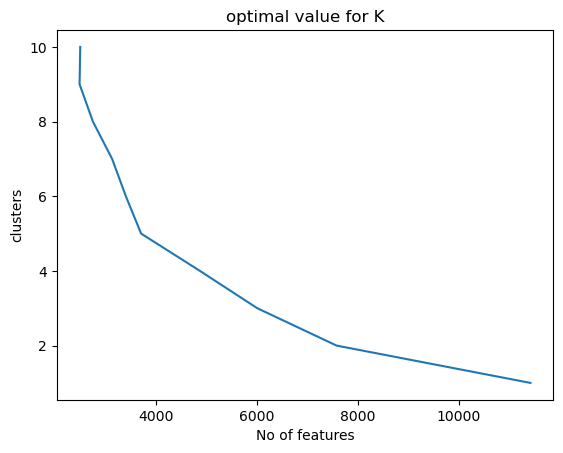

In [39]:
plt.plot(inertia,n_clusters)
plt.xlabel("No of features")
plt.ylabel("clusters")
plt.title("optimal value for K")
plt.show()

## Hierarchial Clustering

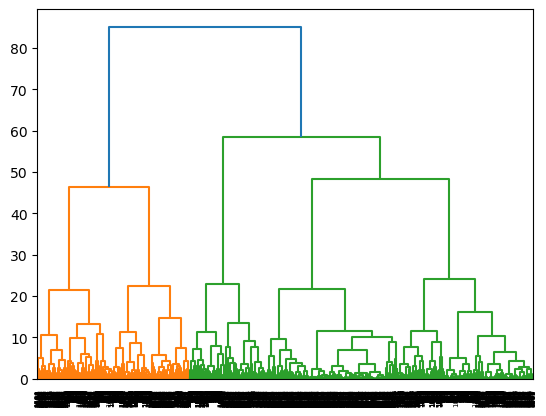

In [41]:
dendrogram=sch.dendrogram(sch.linkage(features,method='ward'))

In [154]:
agg=AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster_hc=agg.fit(features)

In [156]:
cluster_hc

AgglomerativeClustering(n_clusters=5)

In [158]:
cluster_hc.labels_

array([0, 0, 0, ..., 4, 3, 3], dtype=int64)

In [160]:
silhouette_score(features,cluster_hc.labels_)

0.3477997320473653

### DBSCAN ClUSTERING

In [51]:
features

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.098503,-1.316088,-0.766919


In [53]:
output=[]
eps= np.arange(1.0,2.0,0.1)
min_node= range(1,10)
for ep in eps:
    for mn in min_node:
        labels= DBSCAN(eps=ep, min_samples=mn).fit(features)
        set=labels.labels_
        score= silhouette_score(features,set)
        output.append([ep,mn,score])
print(output)

[[1.0, 1, -0.029061727550976222], [1.0, 2, 0.17702987680664714], [1.0, 3, 0.25843238634108556], [1.0, 4, 0.30597094007932524], [1.0, 5, 0.3266640971641498], [1.0, 6, 0.32830267262474194], [1.0, 7, 0.33056016461532867], [1.0, 8, 0.32986436411460013], [1.0, 9, 0.32986436411460013], [1.1, 1, 0.10299205227231699], [1.1, 2, 0.26255120535910537], [1.1, 3, 0.26255120535910537], [1.1, 4, 0.32855020083058883], [1.1, 5, 0.32855020083058883], [1.1, 6, 0.32855020083058883], [1.1, 7, 0.3308800481983385], [1.1, 8, 0.3297624348505021], [1.1, 9, 0.3289963934865599], [1.2000000000000002, 1, 0.14473350236489013], [1.2000000000000002, 2, 0.3274987641855437], [1.2000000000000002, 3, 0.3274987641855437], [1.2000000000000002, 4, 0.3274987641855437], [1.2000000000000002, 5, 0.33108678628217086], [1.2000000000000002, 6, 0.33108678628217086], [1.2000000000000002, 7, 0.3348645625524858], [1.2000000000000002, 8, 0.3348645625524858], [1.2000000000000002, 9, 0.3348645625524858], [1.3000000000000003, 1, 0.243436423

In [54]:
a=pd.DataFrame(output)

In [55]:
a

,0,1,2
0,1.0,1,-0.029062
1,1.0,2,0.177030
2,1.0,3,0.258432
3,1.0,4,0.305971
4,1.0,5,0.326664
...,...,...,...
85,1.9,5,0.345735
86,1.9,6,0.345735
87,1.9,7,0.345735
88,1.9,8,0.345735


In [56]:
sil_score=a.iloc[:,2].max()
a[a[2]==sil_score]

,0,1,2
81,1.9,1,0.345735
82,1.9,2,0.345735
83,1.9,3,0.345735
84,1.9,4,0.345735
85,1.9,5,0.345735
86,1.9,6,0.345735
87,1.9,7,0.345735
88,1.9,8,0.345735
89,1.9,9,0.345735


In [57]:
labels=DBSCAN(eps=1.9,min_samples=3)

In [58]:
cluster_db=labels.fit(features)

In [59]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4])

In [60]:
silhouette_score(features,cluster_db.labels_)

0.34573507061472813

#### Cluster Analysis and Interpretation:

In [119]:
import warnings 
warnings.filterwarnings('ignore')

In [168]:
df['KMeans_Cluster']=cluster.labels_
df['Hierarchical_Cluster']=cluster_hc.labels_
df['DBSCAN_Cluster']=cluster_db.labels_

In [170]:
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('Hierarchical_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               1192.968750  43854.387228   14.804348   1.076087        1.0   
1               1768.394737  65681.716599   18.246964   3.451417        1.0   
2               3217.034335  30587.160944   11.447425   1.064378        1.0   
3               1997.030801  48799.708419   38.616016   1.151951        1.0   
4               1861.728261  93713.666667   11.085145   3.182971        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   2689.142663     5.495924         140.755435   
1                     1.0  29312.882591    17.176113         273.783401   
2                     1.0   2689.344421     5.316524         106.710300   
3                     1.0   6299.408624     7.371663         344.527721

In [172]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,3,0


## Visualization:

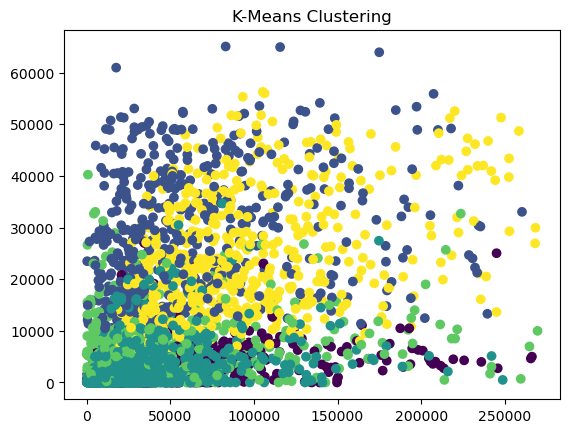

In [175]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

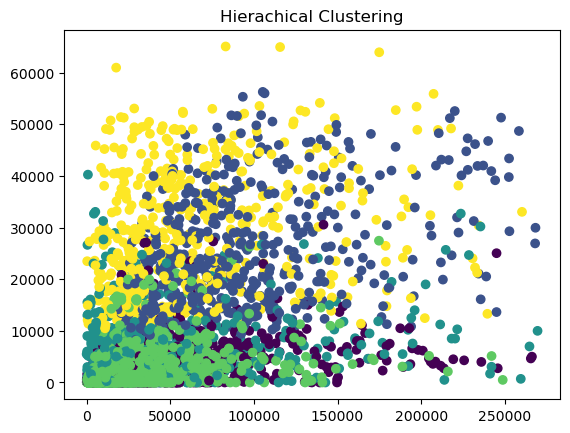

In [177]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierachical Clustering')
plt.show()

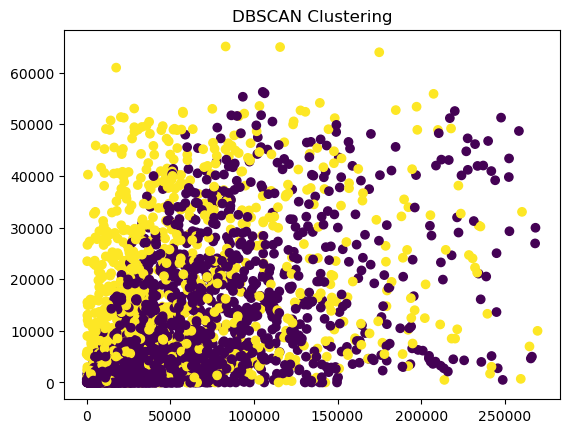

In [179]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 6], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

## Evaluation and Performance Metrics:

In [182]:
silhouette_score(features,cluster.labels_)

0.36129039300941157

In [184]:
silhouette_score(features,cluster_hc.labels_)

0.3477997320473653

In [186]:
silhouette_score(features,cluster_db.labels_)

0.34573507061472813

In [73]:
## Higher silhouette scores indicate better-defined clusters.
### DBSCAN may give lower scores if the data is noisy or contains many outliers.
## K-Means generally performs well on spherical clusters but may struggle with irregular shapes.
### Hierarchical clustering works well with smaller datasets but may become slow with large data.